In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from pathlib import Path
from IPython.display import display

##For this churn problem - the data is being loaded from https://www.kaggle.com/blastchar/telco-customer-churn
def load_data(filepath):
    ext = Path(filepath).suffix
    print('file extension {}'.format(ext[1:]))
    cmd = 'pd.read_'+ext[1:]
    print('command is {}'.format(cmd))
    df = exec(cmd)(filepath)
    return df

def load_clean_data(filepath):
    df = pd.read_csv(filepath)
    #capitalize the column names
    df.columns = [col.title() for col in df.columns]
    
    print('Shape of the data {}'.format(df.shape))
    print('Feature names and data types :: {}'.format(DataFrame(df.dtypes, df.columns)))    
    
    if(df.isnull().any().all()):
        print('\nData entries with null values : \n')
        df[df.isnull()]
    else :
        print('\n\nNo null entries in the data')
        
    print("\nHere's some sample data for you ::\n ")
    display(df)
    return df
        
    
file = '../WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = load_clean_data(file)
    




Shape of the data (7043, 21)
Feature names and data types ::                         0
Customerid         object
Gender             object
Seniorcitizen       int64
Partner            object
Dependents         object
Tenure              int64
Phoneservice       object
Multiplelines      object
Internetservice    object
Onlinesecurity     object
Onlinebackup       object
Deviceprotection   object
Techsupport        object
Streamingtv        object
Streamingmovies    object
Contract           object
Paperlessbilling   object
Paymentmethod      object
Monthlycharges    float64
Totalcharges       object
Churn              object


No null entries in the data

Here's some sample data for you 
    Customerid  Gender  Seniorcitizen Partner Dependents  Tenure Phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       

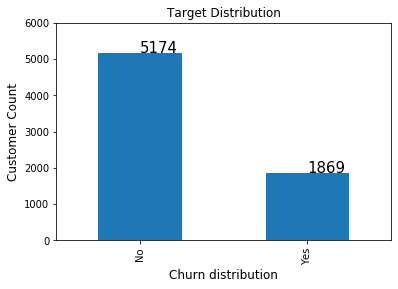

In [55]:
#target is the churn column. Lets see distribution of target.

target_dist = data['Churn'].value_counts()


target_dist.plot(kind='bar', title='Target Distribution')

plt.title('Target Distribution')
plt.xlabel('Churn distribution', fontsize=12)
plt.ylabel('Customer Count', fontsize =12)
#plt.annotate(str(target_dist.loc['No']),(0,target_dist[0]),fontsize = 15)
#plt.annotate(str(target_dist.loc['Yes']),(1,target_dist[1]),fontsize=15)
plt.text
plt.annotate(str())
plt.ylim(top=6000)

plt.show()

In [58]:
#setting churn as 1 or 0 for Yes or No respectively
data['Churn'] = np.where(data['Churn']=='Yes',1,0)

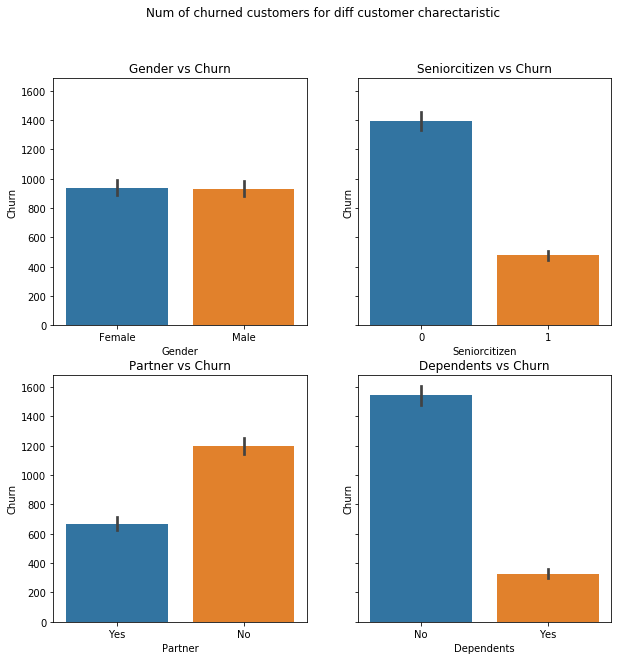

In [73]:
fig, ax = plt.subplots(2,2, figsize=(10,10), sharey=True)

plt.suptitle('Num of churned customers for diff customer charectaristic',fontsize=12)

for axes,x in zip(ax.flatten(),['Gender','Seniorcitizen','Partner','Dependents']):
    sns.barplot(x=x, y='Churn',data=data,ax=axes, estimator=sum,)
    axes.set_title('{} vs Churn'.format(x))
    #axes.annotate(str(data.query('Churn==1').x.value_counts()[0]), (0,))


plt.show()

Ratio of churn is not significantly different for gender. 

Customers who does not have partner or dependants have a higher possibility of churning. They may be only having mobile connections and are ok to change it - attracted to better discounts,offers or better data plans.

Customers with partners and dependents doesnt prefer to change. This could be to avoid changing numbers often as this could be majorly working class. 

Churn ratio is higher for senior citizens - this could be to save money, or not being internet savy.

In [260]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.rand(len(arr)) * stdev

# limit hue to having only 3 distinct colors
def draw_3d_plot(x,y,z,data, hue=None):
    X, Y , Z = [],[],[]
    print('locations of X {}, Y {}, Z {}'.format(hex(id(X)), hex(id(Y)), hex(id(Z))))
    hue_colrs = ['firebrick','indigo','cyan']
    hue_markers = ['v','o', 's']
    
    if hue != None:
        hue_vals = data[hue].nunique()
        
    #check for categorical var and add jitter - need to do encoding before adding jitter
    for (var_out, var_in) in zip([X,Y,Z], [x,y,z]):
        #checking for if categorical var or not
        if(data[var_in].nunique() < 10 ):
            #not replacing on the actual variable 
            print('location in loop is {}'.format(hex(id(var_out))))
            var_out = list(pd.factorize(data[var_in],sort=True)[0])
            #print('after appending shape is {}'.format(len(var_out)))
            var_out = list(rand_jitter(var_out))
            #print('var_out {}'.format(var_out))
            #print()
        else:
            var_out = data[var]
        
    print(DataFrame({'X':X, 'Y':Y, 'Z':Z}).head(10))
            
        
#     from mpl_toolkits.mplot3d import Axes3D 
#     fig = plt.figure(figsize=(7,7))
#     ax = fig.gca(projection = '3d')
                
      
#     for val in range(hue_vals):
#         ax.scatter(X, Y, Z, marker = hue_markers[val], c = hue_colrs[val], edgecolors = None)
    
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     ax.set_zlabel(z)
#     plt.show()

In [261]:
test_df = draw_3d_plot('Seniorcitizen','Partner','Dependents', data = data, hue='Churn')
test_df

locations of X 0x1a2b277a88, Y 0x1a2abfc348, Z 0x1a28ca1cc8
location in loop is 0x1a2b277a88
location in loop is 0x1a2abfc348
location in loop is 0x1a28ca1cc8
Empty DataFrame
Columns: [X, Y, Z]
Index: []


<Figure size 432x288 with 0 Axes>

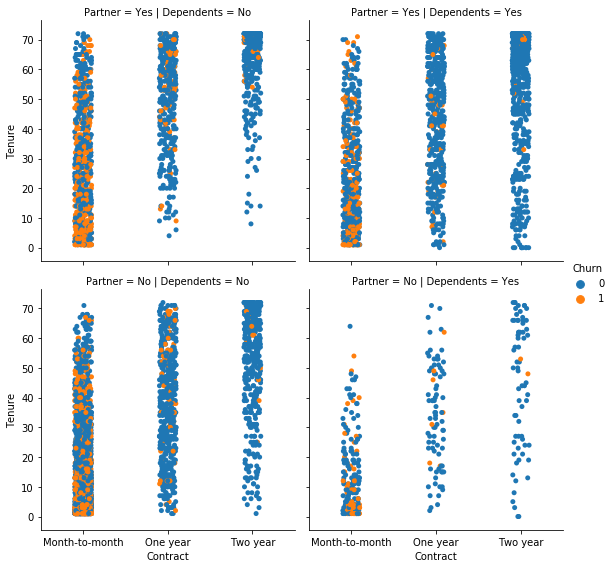

In [136]:
plt.suptitle('Churned customers distribution for Seniors wrt immidiate family')

sns.catplot(x='Contract',y='Tenure',hue='Churn',col='Dependents',row998l;.Partner',data=data,height=4)



The churn rate is higher for monthly contracts concentrated for less than one year tenures. These could be customers who are testing the service 

Customers with Partners and Dependants are more stable in the subscription and they tend to prefer annual contracts. 

<Figure size 1440x1080 with 0 Axes>

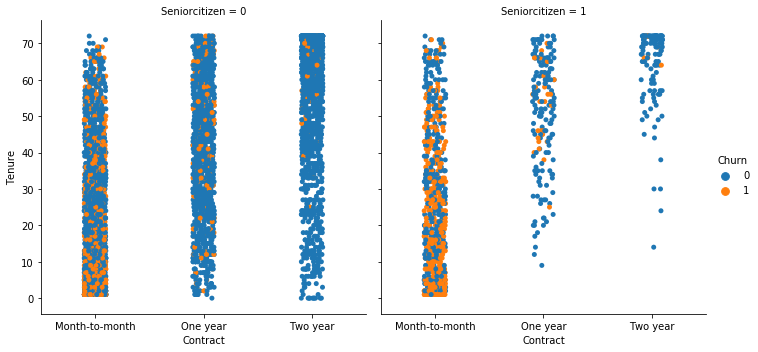

In [192]:
plt.figure(figsize=(20,15))
a = sns.catplot(x='Contract',y='Tenure',hue='Churn',data=data,col='Seniorcitizen')
#a.axes.set_title('Customers contract distribution with respect to age')

#plt.suptitle('Customers contract distribution with respect to age',size=15)
plt.show()

Senior citizens doesnt prefer yearly contracts. They prefer to take monthly contracts and the churn rate is also high which explains first figure. 

In [389]:
#Lets understand how the phone and internet service is spread among the customers. 
#what % of churned customers has no phone service, multiple lines and no lines
churn_df= data.query("Churn==1")

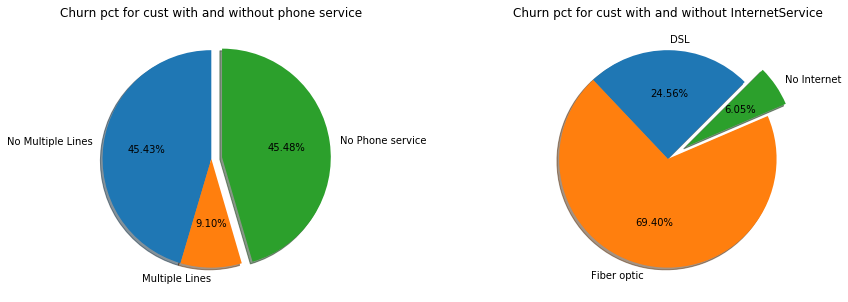

In [381]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(churn_df.groupby('MultipleLines').size(),labels=['No Multiple Lines','Multiple Lines','No Phone service'],shadow=True, 
        autopct = '%1.2f%%',startangle=90,explode=(0,0,0.1))
plt.title('Churn pct for cust opting phone service')

plt.subplot(1,2,2)
plt.pie(churn_df.groupby('InternetService').size(), labels=['DSL','Fiber optic','No Internet'], shadow=True,
       autopct='%1.2f%%',startangle = 45, explode= (0,0,0.2))
plt.title('Churn pct for cust opting InternetService')
plt.show()

plt.subplot()

plt.pie

45% of customers churning out have a phone service available. The other 45% of customers churning out who dont have any phone service at all. These could be the customers with a monthly contract. 

More than 69% of customers churning out have subscribed for a fiber optic internet service. This could be a bad service provision and definitely an area of improvement

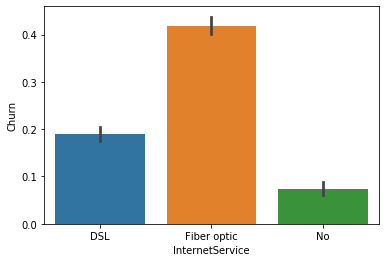

In [423]:
sns.barplot(x='InternetService',y='Churn',hue_order=['OnlineSecurity','OnlineBackup'],data=data)

In [448]:
#Lets convert categorical data into numbers. 
#Phone Service and Internet Service are the major services with other services branching out from there. 
#Customer traits are also objects.


In [533]:
data.Tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

Text(0.5, 0, 'Total Charges')

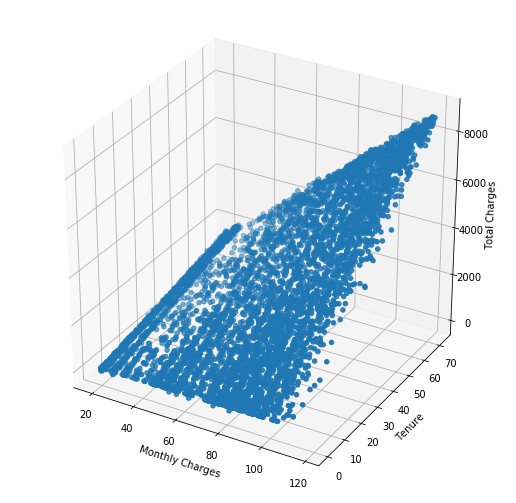

In [111]:
from mpl_toolkits.mplot3d import Axes3D 
#plotting total charges vs monthly charges - are they correlated
#plt.scatter(data.MonthlyCharges, pd.to_numeric(data.TotalCharges, errors='coerce').fillna(0))
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.Monthlycharges, data.Tenure, pd.to_numeric(data.Totalcharges, errors='coerce').fillna(0))
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure')
ax.set_zlabel('Total Charges')

Total Charges are computed based on Tenure and Monthly Charges. We can omit this in the modelling

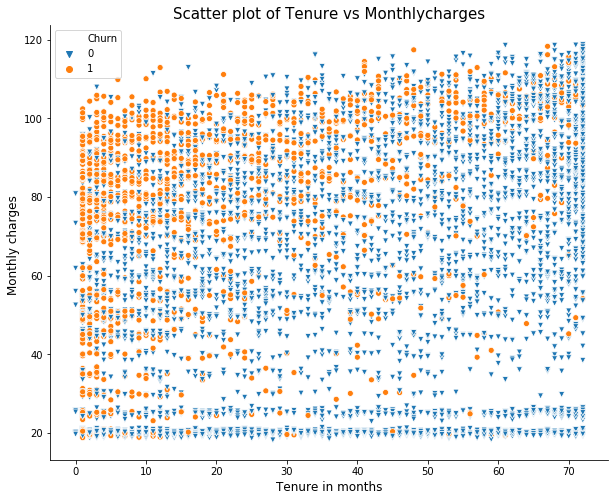

In [293]:
# Lets check Tenure vs monthly charges for customer churn 
plt.figure(figsize=(10,8))
plt.title('Scatter plot of Tenure vs Monthlycharges',fontsize=15)
b = sns.scatterplot(x='Tenure', y='Monthlycharges', hue='Churn', style ='Churn', markers = ['v','o'],data=data)
b.set_xlabel('Tenure in months',fontsize=12)
b.set_ylabel('Monthly charges ',fontsize=12)
sns.despine()
plt.show()

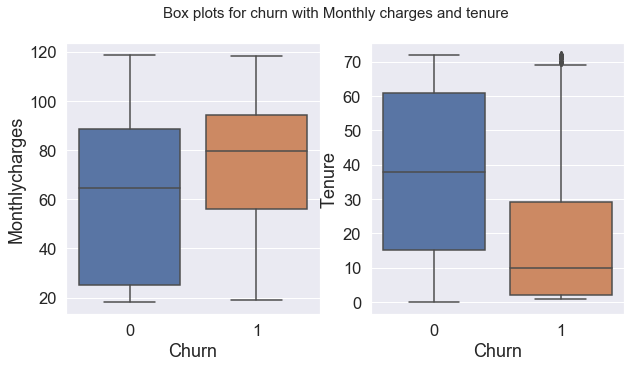

In [304]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
sns.set(font_scale=1.2)
fig.suptitle('Box plots for churn with Monthly charges and tenure',fontsize=15)
sns.boxplot(x='Churn',y='Monthlycharges',data=data, ax= ax1)
sns.boxplot(x='Churn',y='Tenure', data=data, ax=ax2)
plt.show()

Customers with higher monthly charges and who are not more than an year old have a higher churn rate. We also observed that customers with monthly contract had a higher churn rate. We can draw a hypothesis that monthly contracts with more than 80 $ charges are likely to churn. 

In [239]:
#coorelation of categorical variables
import scipy.stats as ss

#this assumes there are no nan values and the data is clean
def cramersphi_corrected(x,y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://github.com/shakedzy/dython/nominal.py
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [283]:
# right now all cols are categorical variables
def corr_matrix(df, columns, mark_cols = False, plot = True, **kwargs):
    """
    Plots correlation matrix of categorical-categorical variables
    Correlation is calculated using phi correlation defined in cramersphi_corrected
    Parameters
    ----------
    df : data whose columns are all categorical. Data needs to be clean with no nan values.
    columns : columns in the dataframe to make correation matrix
    mark_cols : adds a suffix to indicate nominal or continous variable
    plot : indicates whether to make a heatmap or not with the correlation matrix
    kwargs : other arguments for the heatmap, currently annotation and format are read out
    
    Returns
    -------
    correlation matrix as a nxn dataframe with number of columns
    """
    corr_cols = columns
    corr_matrix = pd.DataFrame(index = corr_cols, columns = corr_cols, dtype=float)
    
    for i in range(0,len(corr_cols)):
        for j in range(i,len(corr_cols)):
            if i == j:
                corr_matrix.iloc[i][j] = 1.0
            else :
                corr_ij = cramersphi_corrected(df[columns[i]],df[columns[j]])
                corr_matrix.iloc[i][j] = corr_matrix.iloc[j][i] = corr_ij
    
    if mark_cols == True:
        marked_cols = ['{}_nom'.format(col) for col in corr_cols]
        corr_matrix.columns = marked_cols
        corr_matrix.index = marked_cols
       
    if plot:
        plt.figure(figsize=kwargs.get('figsize',(10,10)))
        plt.title('Heatmap of the categorical columns')
        sns.heatmap(corr_matrix,annot=kwargs.get('annot',True),fmt=kwargs.get('fmt','.2f'),cmap=kwargs.get('cmap',"YlGnBu"))
        plt.show()
        
    return corr_matrix

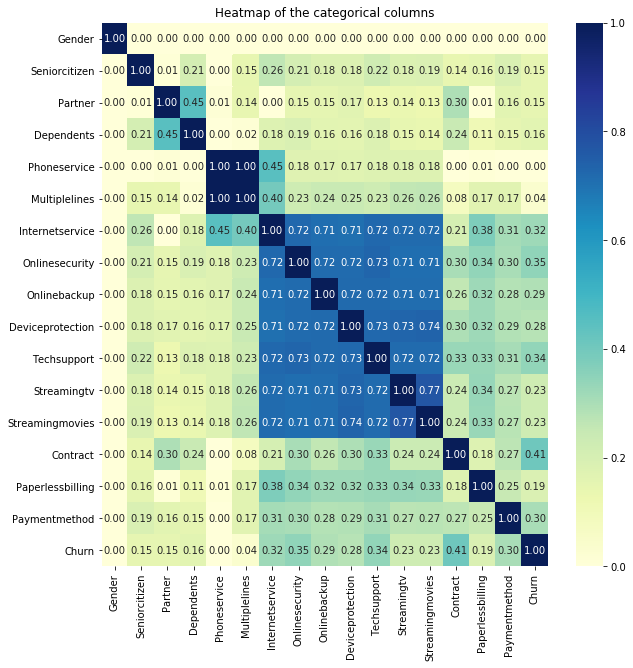

In [284]:
cat_columns = [col for col in data.columns if data[col].nunique()<10]
corr = corr_matrix(data, columns= cat_columns)